In [77]:
import numpy as np

# input points (x1, x2) where -1<= x1 <= 1 and -1<= x2 <= 1

def generate_data(n):
    top_x1 =[]
    top_x2 =[]
    bottom_x1 =[]
    bottom_x2 =[]
     
    cnt = 1
    while(cnt <= n):
        top_x1.append(np.random.uniform(0.0,1.0)) 
        top_x2.append(np.random.uniform(0.0,1.0))
        cnt += 1
        
    cnt = 1
    while(cnt <= n):
        bottom_x1.append(np.random.uniform(-1.0,0.0)) 
        bottom_x2.append(np.random.uniform(-1.0,0.0))
        cnt += 1
            
    return top_x1,top_x2,bottom_x1,bottom_x2


In [78]:
def g_rand_g_svm(top_x1,top_x2,bottom_x1,bottom_x2):
    # hypothesis is a horizontal maximum margin line, SVM
    min_top = min(top_x2)
    max_bottom = max(bottom_x2)
    g_svm = (min_top + max_bottom)/2
    
    # hypothesis is a random hrizontal line
    g_rand = np.random.uniform(-1.0,1.0)
    return g_rand,g_svm

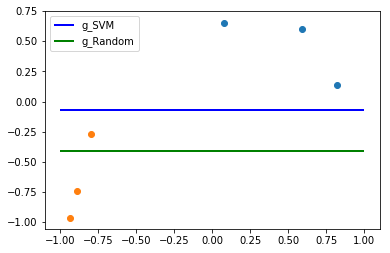

g_Random =  -0.4063583097910213
g_SVM =  -0.06750042731540101


In [79]:
import matplotlib.pyplot as plt

top_x1,top_x2,bottom_x1,bottom_x2 = generate_data(3)
plt.scatter(top_x1,top_x2)
plt.scatter(bottom_x1,bottom_x2)
    
g_rand,g_svm = g_rand_g_svm(top_x1,top_x2,bottom_x1,bottom_x2)
plt.hlines(y=g_svm, xmin=-1.0, xmax=1.0, linewidth=2, color='blue', label= 'g_SVM')
plt.hlines(y=g_rand, xmin=-1.0, xmax=1.0, linewidth=2, color='green', label= 'g_Random')
plt.legend(loc= 'best')
plt.show()  

print("g_Random = ", g_rand)
print("g_SVM = ", g_svm)

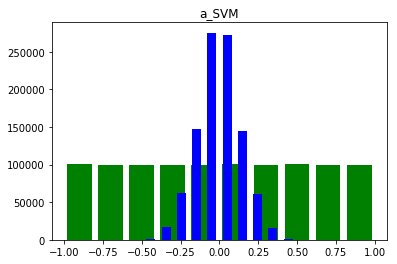

In [80]:
a_rand = []
a_svm = []
cnt = 1
while (cnt <=1000000):
    top_x1,top_x2,bottom_x1,bottom_x2 = generate_data(3)
    g_rand,g_svm = g_rand_g_svm(top_x1,top_x2,bottom_x1,bottom_x2)
    
    a_rand.append(g_rand)
    a_svm.append(g_svm)
    
    cnt +=1
    
plt.hist(a_rand,10, histtype='bar', align='mid', color='g', rwidth=0.8)
plt.title('a_Random')

plt.hist(a_svm,10, histtype='bar', align='mid', color='b', rwidth=0.6)
plt.title('a_SVM')

plt.show()

The resulting a_random values (in green) are uniformly distributed, as expected, with
mean= (-1+1)/2=0 and variance= (1+1)^2/12=1/3=0.67
The resulting a_svm values (in blue) are normally distributed around zero with variance < 0.25
Thus, for both algorithms the bias= mean - f_target = 0-0 = 0

Both algorithms draw from the same hypothesis set, but SVM adds the constraint of maximum margin. Consequently, SVM has less degrees of freedom comparing to Random Line algorithm, resulting in much less variance.
